In [3]:
import pandas as pd
import numpy as np
import re
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import spacy

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
train_df = pd.read_csv("F:/Projects/Machine and Deep Learning/Depression_Severity/Datasets/train.csv")
df2 = pd.read_csv("F:/Projects/Machine and Deep Learning/Depression_Severity/Datasets/test.csv")
df3 = pd.read_csv("F:/Projects/Machine and Deep Learning/Depression_Severity/Datasets/test_labels.csv")

In [4]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [5]:
df2

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [6]:
df3

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...
153159,fffcd0960ee309b5,-1,-1,-1,-1,-1,-1
153160,fffd7a9a6eb32c16,-1,-1,-1,-1,-1,-1
153161,fffda9e8d6fafa9e,-1,-1,-1,-1,-1,-1
153162,fffe8f1340a79fc2,-1,-1,-1,-1,-1,-1


In [7]:
test_df = df2.merge(df3, on = 'id')
test_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,":If you have a look back at the source, the in...",-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,I don't anonymously edit articles at all.,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...
153067,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",-1,-1,-1,-1,-1,-1
153068,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,-1,-1,-1,-1,-1,-1
153069,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",-1,-1,-1,-1,-1,-1
153070,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",-1,-1,-1,-1,-1,-1


In [8]:
test_df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [9]:
test_df = test_df[(test_df['toxic'] != -1) & (test_df['severe_toxic'] != -1) & (test_df['obscene'] != -1) & (test_df['threat'] != -1) & (test_df['insult'] != -1) & (test_df['identity_hate'] != -1)]
test_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0,0,0,0,0,0
7,000247e83dcc1211,:Dear god this site is horrible.,0,0,0,0,0,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0,0,0,0,0,0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0,0,0,0,0,0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
153058,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
153059,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
153062,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
153063,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0


In [10]:
test_df.to_csv('F:/Projects/Machine and Deep Learning/Depression_Severity/Datasets/Updated_Test.csv')

In [11]:
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [13]:
def clean_comment(text):
    if pd.isna(text):
        return ''
    
    text = text.lower().strip()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text = text.replace("’", "'").replace("‘", "'").replace("“", '"').replace("”", '"')
    text = text.replace("–", "-").replace("—", "-")
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[\x00-\x1f\x7f-\x9f]', '', text)
    text = re.sub(r"[^a-z0-9\s\.\,\!\?\'\"\-\$\€\£\¥\¢]", '', text)
    text = re.sub(r'([!?.,])\1+', r'\1', text)
    text = re.sub(r'\s+', ' ', text)
    if text.startswith('"') and text.endswith('"'):
        text = text[1:-1].strip()
    if text.startswith("'") and text.endswith("'"):
        text = text[1:-1].strip()
    return text


In [14]:
train_df['comment_text'] = train_df['comment_text'].apply(clean_comment)
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanationwhy the edits made under my usernam...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0
3,0001b41b1c6bb37e,morei can't make any real suggestions on impro...,0,0,0,0,0,0
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,"and for the second time of asking, when your v...",0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"spitzer umm, theres no actual article for pros...",0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [15]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

def fast_lemmatize(texts):
    lemmatized = []
    for doc in nlp.pipe(texts, batch_size=1000):
        lemmatized.append([token.lemma_ for token in doc if not token.is_punct and not token.is_space])
    return lemmatized

In [17]:
maxlen = train_df['comment_text'].str.split().str.len().max()
maxlen

1400

In [26]:
train_df = train_df[train_df['comment_text'].str.split().str.len() <= 250]
train_df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanationwhy the edits made under my usernam...,0,0,0,0,0,0
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0
3,0001b41b1c6bb37e,morei can't make any real suggestions on impro...,0,0,0,0,0,0
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,"and for the second time of asking, when your v...",0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"spitzer umm, theres no actual article for pros...",0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [27]:
train_df['lemmas'] = fast_lemmatize(train_df['comment_text'].tolist())
train_df

C:\Users\ketan\AppData\Local\Temp\ipykernel_19196\679236727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['lemmas'] = fast_lemmatize(train_df['comment_text'].tolist())


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,lemmas
0,0000997932d777bf,explanationwhy the edits made under my usernam...,0,0,0,0,0,0,"[explanationwhy, the, edit, make, under, my, u..."
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,"[d'aww, he, match, this, background, colour, I..."
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,"[hey, man, I, be, really, not, try, to, edit, ..."
3,0001b41b1c6bb37e,morei can't make any real suggestions on impro...,0,0,0,0,0,0,"[morei, can, not, make, any, real, suggestion,..."
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,"[you, sir, be, my, hero, any, chance, you, rem..."
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,"and for the second time of asking, when your v...",0,0,0,0,0,0,"[and, for, the, second, time, of, ask, when, y..."
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0,"[you, should, be, ashamed, of, yourself, that,..."
159568,ffee36eab5c267c9,"spitzer umm, theres no actual article for pros...",0,0,0,0,0,0,"[spitzer, umm, there, s, no, actual, article, ..."
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0,"[and, it, look, like, it, be, actually, you, w..."


In [34]:
train_df.to_csv("F:/Projects/Machine and Deep Learning/Depression_Severity/Datasets/train_lemma.csv", index=False)
print("SAVED.........")

SAVED.........


In [ ]:
df = pd.read_csv("F:/Projects/Machine and Deep Learning/Depression_Severity/Datasets/train_lemma.csv")
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,lemmas
0,0000997932d777bf,explanationwhy the edits made under my usernam...,0,0,0,0,0,0,"['explanationwhy', 'the', 'edit', 'make', 'und..."
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,"[""d'aww"", 'he', 'match', 'this', 'background',..."
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,"['hey', 'man', 'I', 'be', 'really', 'not', 'tr..."
3,0001b41b1c6bb37e,morei can't make any real suggestions on impro...,0,0,0,0,0,0,"['morei', 'can', 'not', 'make', 'any', 'real',..."
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,"['you', 'sir', 'be', 'my', 'hero', 'any', 'cha..."
...,...,...,...,...,...,...,...,...,...
153067,ffe987279560d7ff,"and for the second time of asking, when your v...",0,0,0,0,0,0,"['and', 'for', 'the', 'second', 'time', 'of', ..."
153068,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0,"['you', 'should', 'be', 'ashamed', 'of', 'your..."
153069,ffee36eab5c267c9,"spitzer umm, theres no actual article for pros...",0,0,0,0,0,0,"['spitzer', 'umm', 'there', 's', 'no', 'actual..."
153070,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0,"['and', 'it', 'look', 'like', 'it', 'be', 'act..."


In [ ]:
df = df[df['lemmas'].apply(len) <= 1000]
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,lemmas
0,0000997932d777bf,explanationwhy the edits made under my usernam...,0,0,0,0,0,0,"['explanationwhy', 'the', 'edit', 'make', 'und..."
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,"[""d'aww"", 'he', 'match', 'this', 'background',..."
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,"['hey', 'man', 'I', 'be', 'really', 'not', 'tr..."
3,0001b41b1c6bb37e,morei can't make any real suggestions on impro...,0,0,0,0,0,0,"['morei', 'can', 'not', 'make', 'any', 'real',..."
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,"['you', 'sir', 'be', 'my', 'hero', 'any', 'cha..."
...,...,...,...,...,...,...,...,...,...
153067,ffe987279560d7ff,"and for the second time of asking, when your v...",0,0,0,0,0,0,"['and', 'for', 'the', 'second', 'time', 'of', ..."
153068,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0,"['you', 'should', 'be', 'ashamed', 'of', 'your..."
153069,ffee36eab5c267c9,"spitzer umm, theres no actual article for pros...",0,0,0,0,0,0,"['spitzer', 'umm', 'there', 's', 'no', 'actual..."
153070,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0,"['and', 'it', 'look', 'like', 'it', 'be', 'act..."


In [ ]:
df.to_csv("F:/Projects/Machine and Deep Learning/Depression_Severity/Datasets/train_lemma.csv", index=False)
print("Saving............")

Saving............


In [4]:
df = pd.read_csv("F:/Projects/Machine and Deep Learning/Depression_Severity/Datasets/train_lemma.csv")
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,lemmas
0,0000997932d777bf,explanationwhy the edits made under my usernam...,0,0,0,0,0,0,"['explanationwhy', 'the', 'edit', 'make', 'und..."
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,"[""d'aww"", 'he', 'match', 'this', 'background',..."
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,"['hey', 'man', 'I', 'be', 'really', 'not', 'tr..."
3,0001b41b1c6bb37e,morei can't make any real suggestions on impro...,0,0,0,0,0,0,"['morei', 'can', 'not', 'make', 'any', 'real',..."
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,"['you', 'sir', 'be', 'my', 'hero', 'any', 'cha..."
...,...,...,...,...,...,...,...,...,...
137136,ffe987279560d7ff,"and for the second time of asking, when your v...",0,0,0,0,0,0,"['and', 'for', 'the', 'second', 'time', 'of', ..."
137137,ffea4adeee384e90,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0,"['you', 'should', 'be', 'ashamed', 'of', 'your..."
137138,ffee36eab5c267c9,"spitzer umm, theres no actual article for pros...",0,0,0,0,0,0,"['spitzer', 'umm', 'there', 's', 'no', 'actual..."
137139,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0,"['and', 'it', 'look', 'like', 'it', 'be', 'act..."


In [5]:
target_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

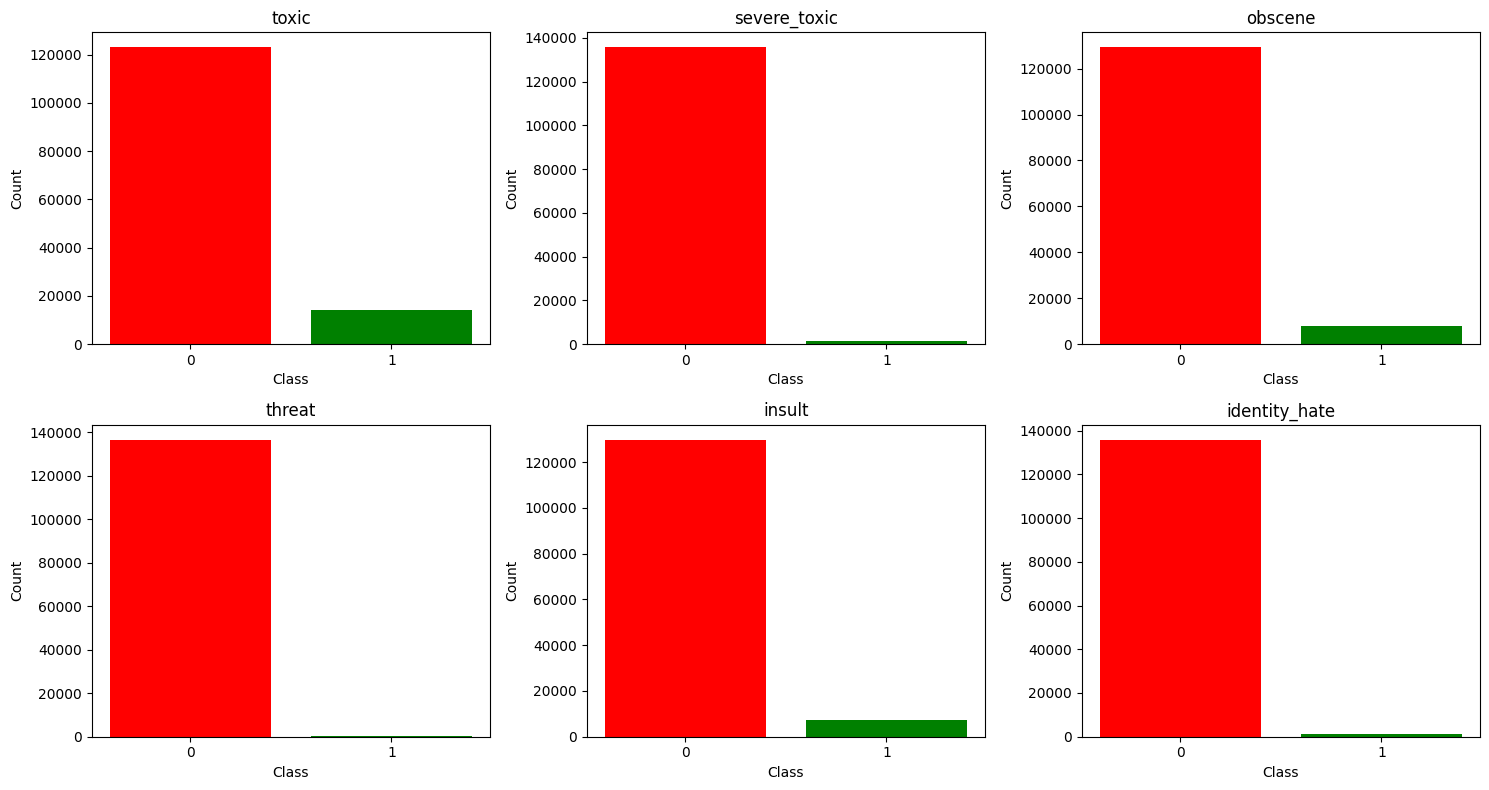

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for ax, col in zip(axes.flatten(), target_cols):
    counts = df[col].value_counts()
    ax.bar(counts.index.astype(str), counts.values, color=['red', 'green'])
    ax.set_title(f"{col}")
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

In [8]:
l = df[(df['toxic'] == 1) & (df['severe_toxic'] == 1) & (df['obscene'] == 1) & (df['threat'] == 1) & (df['insult'] == 1) & (df['identity_hate'] == 1) ]
l

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,lemmas
867,02c6e41e4b317ac3,wouldn't be the first time bitch. fuck you i'l...,1,1,1,1,1,1,"['would', 'not', 'be', 'the', 'first', 'time',..."
1122,039296aa294ee10b,"shut up, you fat poop, or i will kick your ass!",1,1,1,1,1,1,"['shut', 'up', 'you', 'fat', 'poop', 'or', 'I'..."
6247,1368c10281978876,"you're a stupid cunt fuck you dumb arse, your ...",1,1,1,1,1,1,"['you', 'be', 'a', 'stupid', 'cunt', 'fuck', '..."
11729,2405c66d017f139e,bitch you are a little bitch. i fuckin spent 6...,1,1,1,1,1,1,"['bitch', 'you', 'be', 'a', 'little', 'bitch',..."
11996,24d2b50726b67167,i am going to murder zimzalabim st47 for being...,1,1,1,1,1,1,"['I', 'be', 'go', 'to', 'murder', 'zimzalabim'..."
19070,3a704e2efa9fa300,fuck you! you fucking nigger bag of shit i hop...,1,1,1,1,1,1,"['fuck', 'you', 'you', 'fuck', 'nigger', 'bag'..."
25765,4f95394c7229f84c,u motherfukkin bitch i want to rape you smelly...,1,1,1,1,1,1,"['u', 'motherfukkin', 'bitch', 'I', 'want', 't..."
27592,554a87fb67e51344,fuck all asyriac nation qamishli belong to arm...,1,1,1,1,1,1,"['fuck', 'all', 'asyriac', 'nation', 'qamishli..."
29180,5a8eab9cfe601d3a,go fuck yourself bitch. i hate your sould. mot...,1,1,1,1,1,1,"['go', 'fuck', 'yourself', 'bitch', 'I', 'hate..."
33147,66f0a9006c188820,"fuck you honkey, why you hatin' on blacks? you...",1,1,1,1,1,1,"['fuck', 'you', 'honkey', 'why', 'you', 'hatin..."
